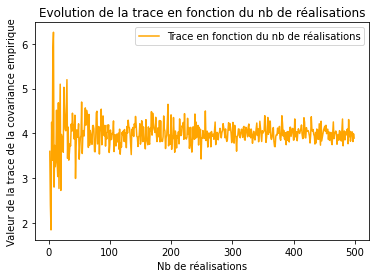

la trace se stabilise autour de la dimension du vecteur gaussien


In [ ]:
# EVALUATION - EXERCICE 6  SIMULATION - Elisabeth Bourgeois
# MS Big Data  - Promotion 2022 - Pages 17 et 18 sur 18

# QUESTION a

import numpy
from matplotlib.pyplot import plot, show, legend

d=4  #dim 3

def f(x):
    # en argument, le nb de réalisations
    Mcov = numpy.cov(numpy.random.normal(0,1,size=(x,d)), rowvar = False)
    Vtrace= Mcov.trace()   # OK pr dim > 2 seulement
    return Vtrace

x = [ m for m in range(2,500) ]
y = [ f(m) for m in range(2,500) ]

plot(x,y,color='orange',label='Trace en fonction du nb de réalisations')
xlabel('Nb de réalisations')
ylabel('Valeur de la trace de la covariance empirique')
title("Evolution de la trace en fonction du nb de réalisations")
legend()
show()

print("la trace se stabilise autour de la dimension du vecteur gaussien")

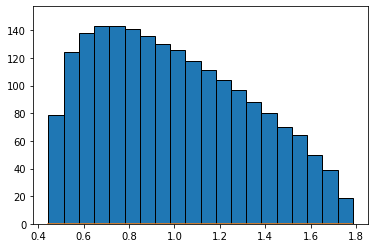

In [1]:
# QUESTION b
# La covariance empirique semble approcher la cov theorique à mesure que n grandit


# QUESTION c

import numpy
import matplotlib.pyplot as plt


n=18000  # nb realisations
p=2000  # dim du vecteur gaussien centré

# les valeurs propres semblent se distribuer d'une manière remarquable selon les 
# grandes valeurs de n et p , et surtout de leur rapport. 
# En effet, pour n > p, avec n et p "grands", on obtient l'allure en cloche inversée

# il semblerait que Marchenko et Pastur aient décrit cette allure, ce qui a
# donné naissance à la loi de "Marchenko - Pastur"
# Sur wikipedia, nous retrouvons la distribution en fonction des lambda (= n /p)
# https://en.wikipedia.org/wiki/Marchenko%E2%80%93Pastur_distribution

# pour afficher la distribution vers laquelle les val propres semblent s'approcher
def marchpast(l, g):
    "distribution de Marchenko-Pastur"   # hommage aux Ukrainiens!
    def m0(a):
        "Element wise maximum of (a,0)"
        return numpy.maximum(a, numpy.zeros_like(a))
    gplus=(1+g**0.5)**2
    gminus=(1-g**0.5)**2
    return numpy.sqrt(  m0(gplus  - l) *  m0(l- gminus)) / ( 2*numpy.pi*g*l)

# "Calcul et affichage de l'histogramme des val propres"
"Calcul et affichage de l'histogramme des val propres"
ee, ev=numpy.linalg.eigh(numpy.cov(numpy.random.normal(0,1,size=(n,p)), rowvar=False))
nn, bb, patches=plt.hist(ee, bins=20, ec='black')
x=numpy.arange(bb[0], bb[-1], 0.003)
plt.plot(x, marchpast(x, n/p))   # ne fonctionne pas (pas encore)
plt.ylim(top=nn[1:].max() * 1.1)
plt.show()